In [71]:
import requests 
import pandas as pd 
from plyer import notification
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
url = 'https://restcountries.com/v3.1/all'
etapa = 'Buscar Dados'
resposta = requests.get(url).json()
resposta_code = requests.get(url).status_code

In [57]:
def alerta(codigo, etapa):
    data_atual = datetime.now().strftime('%d/%m/%y %H:%M:%S')

    msg = ''
    
    if resposta_code == 200:
        msg = 'Sucesso'
    else:
        msg = f'Falha Codigo {resposta_code}'
        
    mensagem = f'{msg} no carregamento na {url} na etapa {etapa}\n{data_atual}'
    
    if codigo != 200:
        codigo = 'ATENÇÃO: Conexao com Erro'
    else:
        codigo = 'Conectado com sucesso' 
    
    notification.notify(
        title=codigo,
        message=mensagem,
        timeout=10
    )

alerta(resposta_code, etapa)

In [58]:
paises = []
populacao = []

for dados in resposta:
    paises.append(dados['name']['common'])
    populacao.append(dados['population'])


In [59]:
df = pd.DataFrame({'Pais':paises, 'Populacao':populacao})

In [70]:
df_maior = df.nlargest(10,'Populacao')

In [72]:
sns.set(style='whitegrid')

Text(0.5, 1.0, 'Top 10 Países por População')

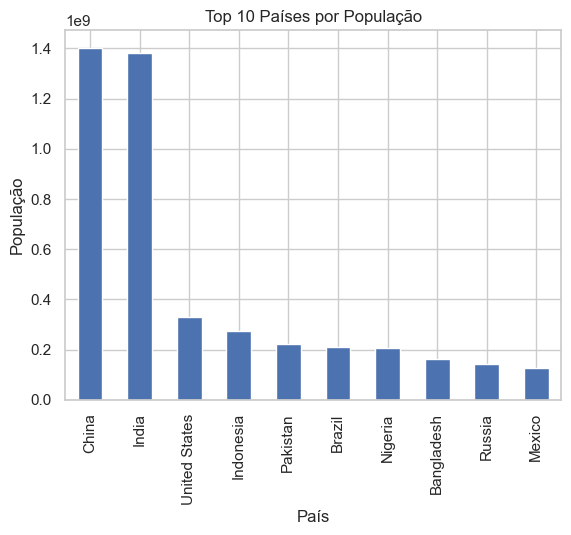

In [89]:
grafico = df_maior.plot(kind='bar', x='Pais', y='Populacao', legend=False)
plt.xlabel('País')
plt.ylabel('População')
plt.title('Top 10 Países por População')